# Lab 4: Polynomial Regression

In [1]:
import os
import random
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': (10,6)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 0: Import  datasets

1. Import training ('data/lab4-400-training.csv') and testing ('data/lab4-100-testing.csv') datasets into separate matrices. Use [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) or your data class.
2. The column x is the independent variable.  Columns y1, y2, and y3 are dependent variables.

In [9]:
training_data_fp = 'data/lab4-400-training.csv'
training_data = np.genfromtxt(training_data_fp, delimiter=',')
training_data = training_data[2:, :]

testing_data_fp = 'data/lab4-100-testing.csv'
test_data = np.genfromtxt(testing_data_fp, delimiter=',')
test_data = test_data[2:, :]

print(f'training data:\n {training_data[:5, :]}')
print(f'test data:\n {test_data[:5, :]}')

print('''
--------------------------------------
Your results should look like
--------------------------------------
A first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
AT first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]
''')

training data:
 [[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
test data:
 [[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]

--------------------------------------
Your results should look like
--------------------------------------
A first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
AT first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]



## Task 1. 3 dimensional polynomial regression

### 1a. Make a polynomial matrices

1. Make a polynomial matrices for the training dataset using the independent variable
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), Ap, with the same number of rows as the training dataset and 4 columns
    5. Update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
2. Make a polynomial matrix for the test dataset
    3. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), ATp, with the same number of rows as the test dataset and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
1. Make a polynomial matrix to graph the prediction line
    1. For graphing create a [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), line_x, from the minimum(x)-.1  value to the maximum(x)+.1 value with 100 steps
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), lineM_x, with the same number of rows as the training dataset and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix


In [21]:
Ap = np.ones([training_data.shape[0], 4])
Ap[:, 1] = training_data[:, 0]
Ap[:, 2] = training_data[:, 0] ** 2
Ap[:, 3] = training_data[:, 0] ** 3

print(f'Ap first 5 rows: \n{Ap[:5, :]}')

ATp = np.ones([test_data.shape[0], 4])
ATp[:, 1] = test_data[:, 0]
ATp[:, 2] = test_data[:, 0] ** 2
ATp[:, 3] = test_data[:, 0] ** 3
print(f'ATp first 5 rows: \n{ATp[:5, :]}')

x = test_data[:, 0]
line_x = np.linspace(np.min(x)-0.1, np.max(x)+0.1, test_data.shape[0])
lineM_x = np.ones([test_data.shape[0], 4])
lineM_x[:, 1] = line_x[:]
lineM_x[:, 2] = line_x[:] ** 2
lineM_x[:, 3] = line_x[:] ** 3
print(f'lineM_x first 5 rows: \n{lineM_x[:5, :]}')

print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
[[ 1.      -1.00188  1.00377 -1.00566]
 [ 1.      -0.98052  0.96142 -0.9427 ]
 [ 1.      -0.95916  0.91999 -0.88242]
 [ 1.      -0.9378   0.87947 -0.82477]
 [ 1.      -0.91644  0.83987 -0.76969]]
''')

Ap first 5 rows: 
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows: 
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows: 
[[ 1.      -1.07014  1.14521 -1.22554]
 [ 1.      -1.04675  1.09569 -1.14692]
 [ 1.      -1.02336  1.04728 -1.07175]
 [ 1.      -0.99998  0.99995 -0.99993]
 [ 1.      -0.97659  0.95372 -0.93139]]

--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.

### 1b. Calculate 3 dimensional polynomial regression
1.  Use [linalg.lstsq]() from scipy to calculate and print the weights, residuals and rank for the dependent variable y1. 
2.  Calculate and print the $R^2$ value.
    

In [29]:
y = training_data[:, 1]
c, residuals, rank, _ = scipy.linalg.lstsq(Ap, y)

mean = np.mean(y)
smd = np.linalg.norm(y-mean) ** 2 
r = 1 - residuals/smd

print(f'c: {c}')
print(f'residuals: {residuals}')
print(f'rank: {rank}')
print(f'r-sqaured: {r}')

print('''
--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211
''')

c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-sqaured: 0.11595609001119234

--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211



### 1c. Testing and prediction

1. calculate the $R^2$ for the linear regressions ability predict the test dataset
    1.  Multiply ATp with the weights to get the predicted values
    2.  Calculate the $R^2$ value and print it for each dependent variable.
    > $R^2 = 1 - \frac{\sum_i \left (y_i - \hat{y}_i \right )^2}{\sum_i \left (y_i - \bar{y} \right )^2}$ <br> <br> $y_i$ are the dependent variable values from the test dataset <br> $\bar{y}_i$ is the mean of the dependent variable values from the test dataset <br> $\hat{y}_i$ is the y values *predicted* by the regression for the test dataset 

2. Print the $R^2$ for the test dataset

In [34]:
predicted = ATp @ c 
y = test_data[:, 1]
mean = np.mean(y)

R2 = 1 - (np.linalg.norm(y-predicted)**2)/(np.linalg.norm(y-mean)**2)

print(f'r2 test: {R2}')

print('''
--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438
''')

r2 test: 0.4431027176546438

--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438



### 1d. Graph Results
2. In one graph
    1. Graph the training data as a scatter plot.
    1. Graph the test dataset as a scatter plot.
    1. Graph the prediction line with line_x as the dependent variable and multiplying lineM_x with the weights for the independent variable.
    1. Include a title (with the two $R^2$ values), axis labels, and a legend

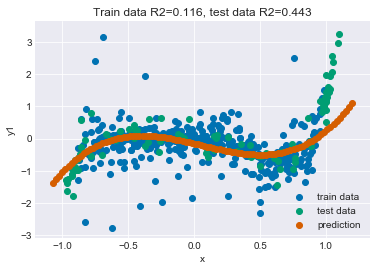

In [44]:
fig, ax = plt.subplots()

ax.scatter(training_data[:, 0], training_data[:, 1])
ax.scatter(test_data[:, 0], test_data[:, 1])
ax.scatter(line_x, lineM_x @ c)

ax.legend(['train data', 'test data', 'prediction'])
ax.set_title('Train data R2=0.116, test data R2=0.443')
ax.set_xlabel('x')
_ = ax.set_ylabel('y1')

## Task 2: Explore different polynomial degrees

Using the above code as a starting out place calculate the polynomial regression for the datasets with different polynomial degrees

### 2a.  Make 3 polynomial matrices: 1 for the training dataset, 1 for the test dataset and 1 for the prediction line
1. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), Ap, with the same number of rows as the training dataset and 10 columns
1. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), ATp, with the same number of rows as the testing dataset and 10 columns
1. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), lineM_x, with the same number of rows as line_x and 10 columns
1. For each matrix update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed, and so on to the 10th column 
1. Print the first row of each matrix


In [46]:
def set_values(data, x, M):
    for i in range(1, M):
        data[:, i] = x ** i 
        
    return data

Ap = np.ones([training_data.shape[0], 10])
Ap = set_values(Ap, training_data[:, 0], 10)

print(f'Ap first row: \n{Ap[0, :]}')

ATp = np.ones([test_data.shape[0], 10])
ATp = set_values(ATp, test_data[:, 0], 10)
print(f'ATp first row: \n{ATp[0, :]}')

x = test_data[:, 0]
line_x = np.linspace(np.min(x)-0.1, np.max(x)+0.1, test_data.shape[0])
lineM_x = np.ones([test_data.shape[0], 10])
lineM_x = set_values(lineM_x, line_x, 10)
print(f'lineM_x first row: \n{lineM_x[0, :]}')

print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first row
[[1.      0.86084 0.74104 0.63792 0.54915 0.47273 0.40694 0.35031 0.30156 0.2596 ]]
ATp first row
[[ 1.      -0.91878  0.84417 -0.77561  0.71261 -0.65474  0.60156 -0.55271 0.50782 -0.46658]]
lineM_x first row
[[ 1.      -1.00188  1.00377 -1.00566  1.00755 -1.00945  1.01135 -1.01325 1.01516 -1.01707]]
''')

Ap first row: 
[1.      0.86084 0.74104 0.63792 0.54915 0.47273 0.40694 0.35031 0.30156
 0.2596 ]
ATp first row: 
[ 1.      -0.91878  0.84417 -0.77561  0.71261 -0.65474  0.60156 -0.55271
  0.50782 -0.46658]
lineM_x first row: 
[ 1.      -1.07014  1.14521 -1.22554  1.3115  -1.40349  1.50194 -1.60729
  1.72003 -1.84068]

--------------------------------------
Your results should look like
--------------------------------------
Ap first row
[[1.      0.86084 0.74104 0.63792 0.54915 0.47273 0.40694 0.35031 0.30156 0.2596 ]]
ATp first row
[[ 1.      -0.91878  0.84417 -0.77561  0.71261 -0.65474  0.60156 -0.55271 0.50782 -0.46658]]
lineM_x first row
[[ 1.      -1.00188  1.00377 -1.00566  1.00755 -1.00945  1.01135 -1.01325 1.01516 -1.01707]]



### 2b. Calculate multiple dimensional polynomial regression

1.  Calculate the polynomial regression for 1st degree through 10th degree
    1.  Using scipy's [linalg.lstsq]() to calculate the weights, residuals and rank. 
    2.  Calculate and print the $R^2$ value using the residual.
    2.  Calculate the $R^2$ for the linear regressions ability predict the test dataset.
        1. Multiply ATp with the weights to get the predicted values and calculate the $R^2$ value
    1. Add to the plot the prediction line with line_x as the dependent variable and multiplying lineM_x with the weights as the independent variable.  Include the rank, $R^2$ value for the training data and the test data in the label for the line.
2. Graph the results (all in one plot)
    1. Graph the training data as a scatter plot.
    1. Graph the test dataset as a scatter plot.
    1. Include a title, axis labels, and a legend.
    1. Draw the legend outside of the plot using the parameter bbox_to_anchor=(1.01, 1)


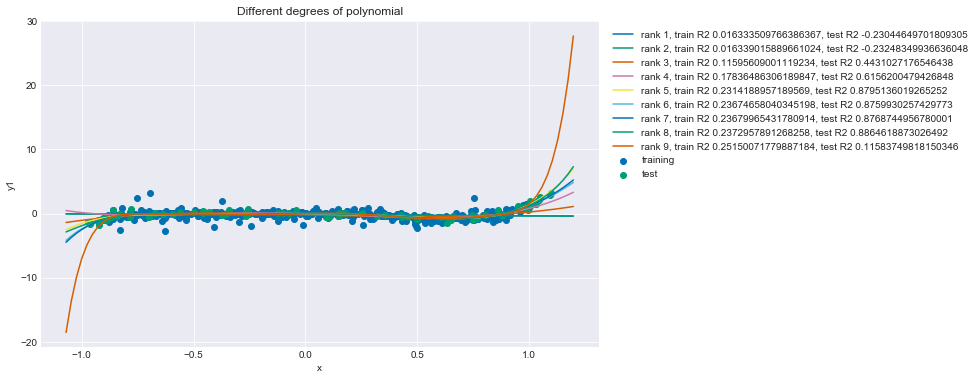

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
legends = [] 


for i in range(1, 10):
    y = training_data[:, 1]
    c, residuals, rank, _ = scipy.linalg.lstsq(Ap[:, :i+1], y)

    
    predicted = ATp[:, :i+1] @ c 
    mean = np.mean(y)
    smd = np.linalg.norm(y-mean) ** 2 
    r = 1 - residuals/smd
    
    mean = np.mean(test_data[:, 1])
    y = test_data[:, 1]
    R2 = 1 - (np.linalg.norm(y-predicted)**2)/(np.linalg.norm(y-mean)**2)
    
    predicted = lineM_x[:, :i+1] @ c
    ax.plot(line_x, predicted)
    legends.append(f'rank {i}, train R2 {r}, test R2 {R2}')

ax.scatter(training_data[:, 0], training_data[:, 1])
ax.scatter(test_data[:, 0], test_data[:, 1])
legends.append('training')
legends.append('test')

ax.legend(legends, bbox_to_anchor=(1.01, 1))
ax.set_xlabel('x')
ax.set_ylabel('y1')
_ = ax.set_title('Different degrees of polynomial')

## Task 3.  Graph the datasets with the best polynomial regression

1.  Review your results from Task 2 (graph and $R^2$ results) and choose the best polynomial degree.
2.  Graph the training data, test data and best line representing the best polynomial degree.
    1.  Include axis labels, and legend and a title (with rank and $R^2$ values for the training data and the test data).
3.  Explain your results from Task 2, which polynomial degree you chose and why?

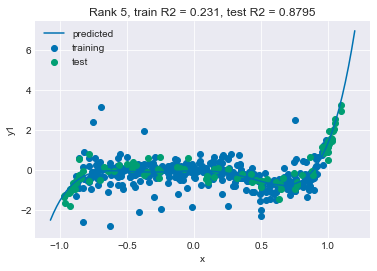

In [75]:
y = training_data[:, 1]
c, residuals, rank, _ = scipy.linalg.lstsq(Ap[:, :6], y)

predicted = lineM_x[:, :6] @ c 

fig, ax = plt.subplots()


ax.plot(line_x, predicted)
ax.scatter(training_data[:, 0], training_data[:, 1])
ax.scatter(test_data[:, 0], test_data[:, 1])


ax.legend(['predicted', 'training', 'test'])

ax.set_xlabel('x')
ax.set_ylabel('y1')
_ = ax.set_title('Rank 5, train R2 = 0.231, test R2 = 0.8795')


## Task 4:  Complete Task 2b and 3 using y2 and the dependent variable

1.  Copy code from Task 2b and modify y and yT to use y2 as the dependent dataset.
1.  Review your results and choose the best polynomial degree.
2.  Copy code from Task 3 and modify y and yT to use y2 as the dependent dataset.
3.  Explain your results, which polynomial degree you chose and why?

## Task 5: Complete Task 2b and 3 using y3 and the dependent variable

1.  Copy code from Task 2b and modify y and yT to use y3 as the dependent dataset.
1.  Review your results and choose the best polynomial degree.
2.  Copy code from Task 3 and modify y and yT to use y3 as the dependent dataset.
3.  Explain your results, which polynomial degree you chose and why?